In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [80]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [81]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Visualization

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

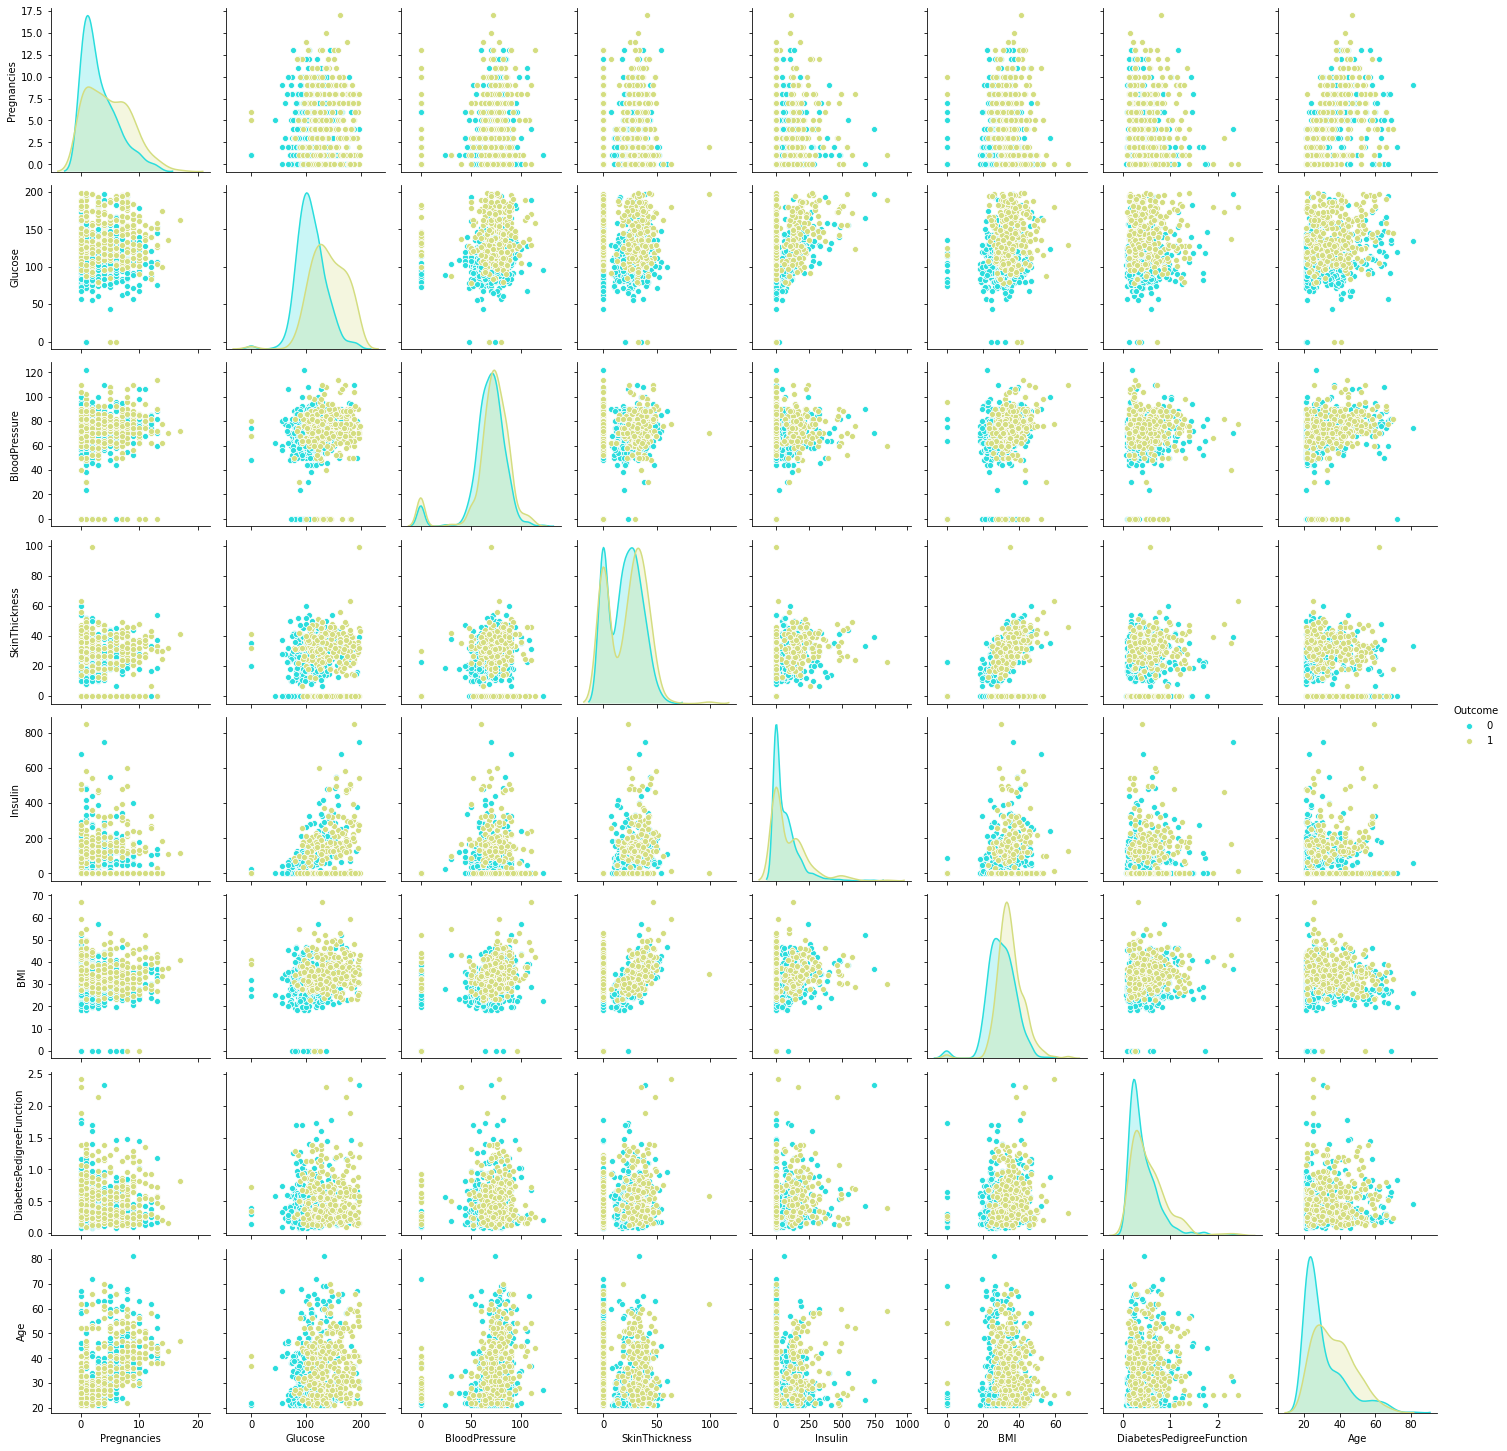

In [84]:
sns.pairplot(data = df, hue = 'Outcome', palette = "rainbow")

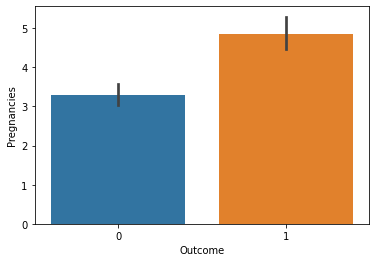

In [85]:
sns.barplot(x = 'Outcome',y = 'Pregnancies', data=df )

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


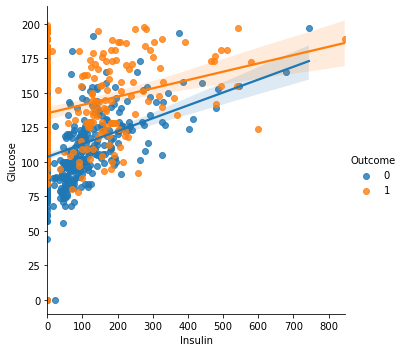

In [87]:
sns.lmplot(x = 'Insulin', y = 'Glucose', data = df, hue = 'Outcome')

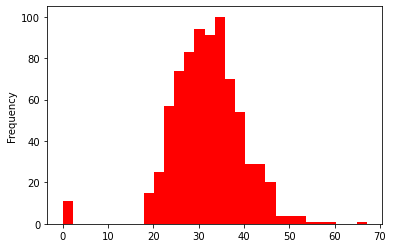

In [88]:
df.BMI.plot(kind = 'hist', bins= 30, color = 'red')

In [89]:
df.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

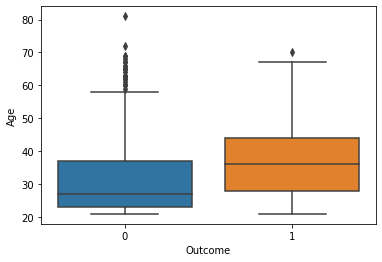

In [90]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df)

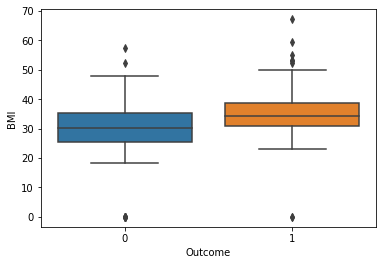

In [91]:
sns.boxplot(x = 'Outcome', y = 'BMI', data = df)

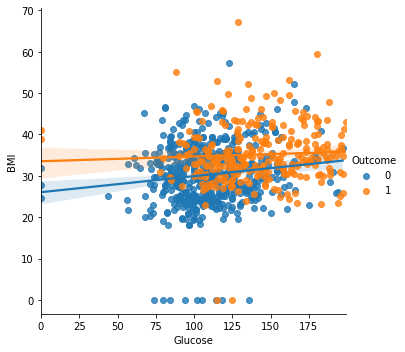

In [92]:
sns.lmplot(x = 'Glucose', y = 'BMI', hue = 'Outcome', data = df)

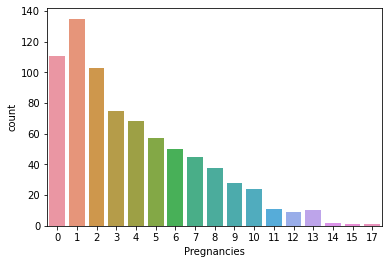

In [93]:
sns.countplot(x = 'Pregnancies',data = df)

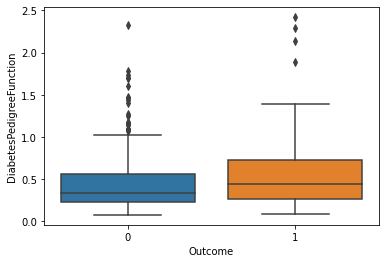

In [94]:
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df)

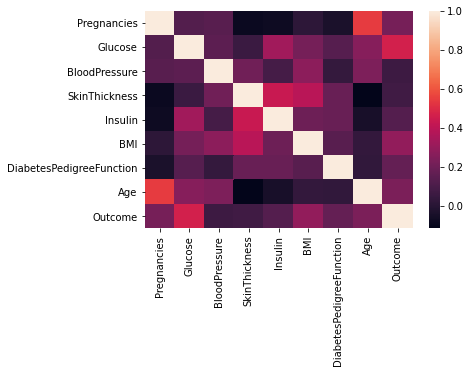

In [95]:
corr = df.corr()
sns.heatmap(corr)

# Splitting data into training and test set

In [96]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Kernel SVM Model

In [99]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [100]:
y_pred = classifier.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)
accuracy_score(y_test, y_pred)

[[117  13]
 [ 30  32]]


0.7760416666666666

# RandomForest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [103]:
y_pred = classifier.predict(X_test)

In [104]:
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)
accuracy_score(y_test, y_pred)

[[110  20]
 [ 33  29]]


0.7239583333333334

# KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [106]:
y_pred = classifier.predict(X_test)

In [107]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[114  16]
 [ 22  40]]


0.8020833333333334

# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [109]:
y_pred = classifier.predict(X_test)

In [110]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[118  12]
 [ 26  36]]


0.8020833333333334

KNN and Logistic regression model has high accuracy score